# Predecir el peso de un pez en función de su longitud

In [3]:
# Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Leer archivo csv
import pandas as pd

df = pd.read_csv("Fish.csv")

print(df.head())


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


## Proceso Data Wrangling

In [5]:
# Obtener informacion de los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# Conocer el total de datos
df.shape

(159, 7)

In [7]:
# Conocer la cantidad de datos nulos que debo reemplazar
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
# Conocer la cantidad de datos duplicados que debo reemplazar
df.duplicated().sum()

0

In [9]:
# Modificar el nombre de las tabla para ser mas entendible
df = df.rename(columns={"Length1":"Length_Vertical", "Length2":"Length_Diagonal", "Length3":"Length_Cross"})
print(df.head())

  Species  Weight  Length_Vertical  Length_Diagonal  Length_Cross   Height   
0   Bream   242.0             23.2             25.4          30.0  11.5200  \
1   Bream   290.0             24.0             26.3          31.2  12.4800   
2   Bream   340.0             23.9             26.5          31.1  12.3778   
3   Bream   363.0             26.3             29.0          33.5  12.7300   
4   Bream   430.0             26.5             29.0          34.0  12.4440   

    Width  
0  4.0200  
1  4.3056  
2  4.6961  
3  4.4555  
4  5.1340  


## Proceso EDA

In [10]:
# Entender los datos 
df.describe()

,Weight,Length_Vertical,Length_Diagonal,Length_Cross,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
df["Species"].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [23]:
columnas = ['Length_Vertical', 'Length_Cross', 'Length_Diagonal', 'Height', 'Width', 'Weight']
df_correlacion = df[columnas]
df_correlacion.corr()

,Length_Vertical,Length_Cross,Length_Diagonal,Height,Width,Weight
Length_Vertical,1.000000,0.992031,0.999517,0.625378,0.867050,0.915712
Length_Cross,0.992031,1.000000,0.994103,0.703409,0.878520,0.923044
Length_Diagonal,0.999517,0.994103,1.000000,0.640441,0.873547,0.918618
Height,0.625378,0.703409,0.640441,1.000000,0.792881,0.724345
Width,0.867050,0.878520,0.873547,0.792881,1.000000,0.886507
Weight,0.915712,0.923044,0.918618,0.724345,0.886507,1.000000


### Histograma del peso de los peces

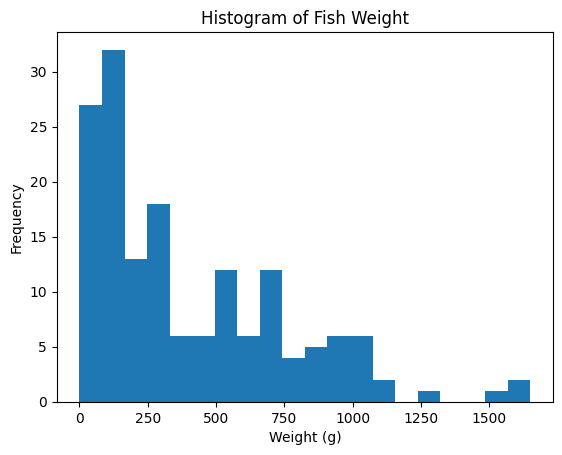

In [13]:
# muestra la distribución del peso de los peces
plt.hist(df["Weight"], bins=20) 
plt.xlabel("Weight (g)")
plt.ylabel("Frequency")
plt.title("Histogram of Fish Weight")
plt.show()

### Boxplot del peso de los peces según la especie

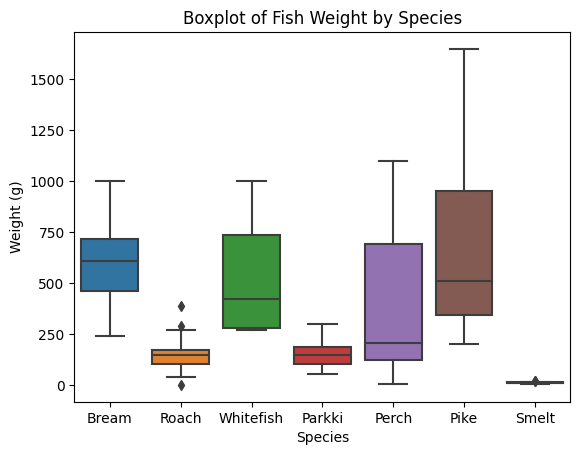

In [14]:
# muestra cómo varía el peso con cada especie de pez
sns.boxplot(x="Species", y="Weight", data=df) 
plt.xlabel("Species")
plt.ylabel("Weight (g)")
plt.title("Boxplot of Fish Weight by Species")
plt.show()

### Gráfico de dispersión del peso y la longitud vertical de los peces

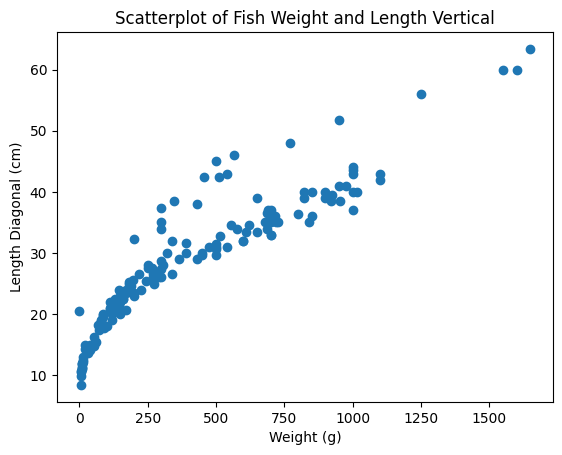

In [56]:
# muestra si hay alguna relación entre el peso y la longitud vertical de los peces
plt.scatter(df["Weight"], df["Length_Diagonal"])
plt.xlabel("Weight (g)")
plt.ylabel("Length Diagonal (cm)")
plt.title("Scatterplot of Fish Weight and Length Diagonal")
plt.show()

### Mapa de calor de la matriz de correlación entre las variables numéricas

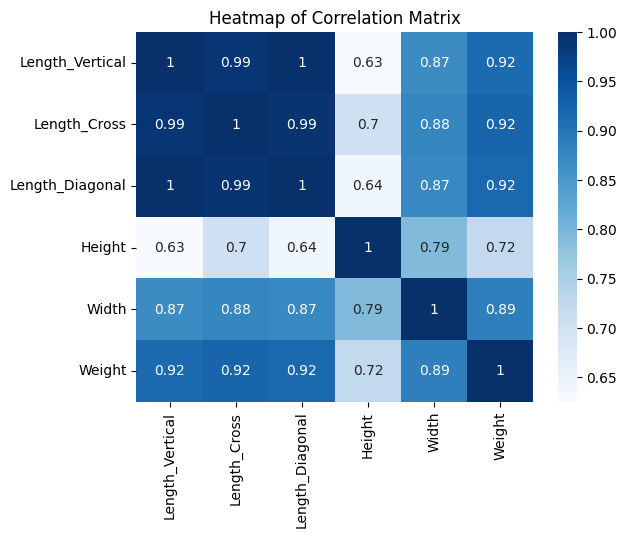

In [24]:
# muestra las correlaciones entre todas las variables numéricas
sns.heatmap(df_correlacion.corr(), annot=True, cmap="Blues")
plt.title("Heatmap of Correlation Matrix")
plt.show()

## Modelo predictivo

### Regresión lineal simple:

In [51]:
from sklearn.linear_model import LinearRegression

In [57]:
# Seleccionar las variables predictoras y la variable objetivo
x = df[["Length_Diagonal"]]
y = df["Weight"]

In [58]:
# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

In [59]:
# Ajustar el modelo a los datos
model.fit(x, y)

LinearRegression()

Se utiliza el método fit(x, y) del objeto model para ajustar el modelo de regresión lineal a los datos de entrenamiento x y y. Esto implica encontrar la mejor línea recta que se ajuste a los puntos de datos para predecir el peso a partir de la longitud vertical.

In [60]:
# Hacer una predicción con una longitud vertical de 30 cm
prediction = model.predict([[30]])

c:\Users\guerr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


La predicción del modelo para un pez con una longitud diagonal de 30 cm es 446.94 gramos aprox.


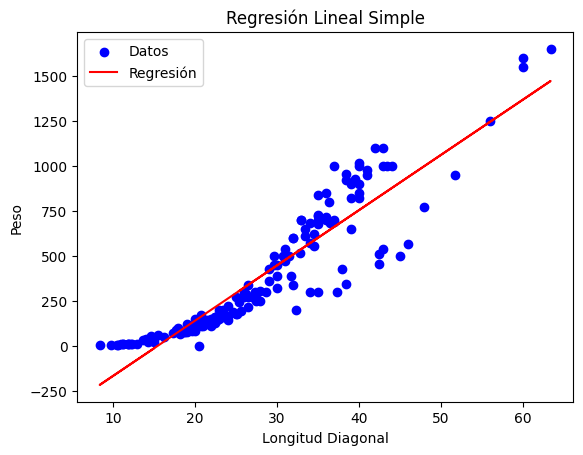

In [62]:
# Graficar los datos y la línea de regresión
plt.scatter(x, y, color='b', label='Datos')
plt.plot(x, model.predict(x), color='r', label='Regresión')
plt.xlabel('Longitud Diagonal')
plt.ylabel('Peso')
plt.title('Regresión Lineal Simple')
plt.legend()

# Imprimir la predicción
print(f"La predicción del modelo para un pez con una longitud diagonal de 30 cm es {prediction[0]:.2f} gramos aprox.")

# Mostrar el gráfico
plt.show()

Considerando la información presentada en el gráfico, se puede deducir que el peso del pescado está relacionado con la longitud diagonal del mismo. Esto se debe a que la línea sigue la tendencia de los datos, indicando una correlación positiva entre estas variables.

### Regresión lineal múltiple

In [64]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [63]:
X = df[["Length_Diagonal", "Width", "Species"]]
y = df["Weight"]

In [65]:
# Crear un codificador one-hot para la variable categórica 'Species'
encoder = OneHotEncoder()
ct = ColumnTransformer([("encoder", encoder, [2])], remainder="passthrough")
X_encoded = ct.fit_transform(X)

In [67]:
# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

In [68]:
# Ajustar el modelo a los datos
model.fit(X_encoded, y)

LinearRegression()

In [76]:
# Hacer una predicción para un Bass con una longitud vertical de 25 cm y una anchura transversal de 10 cm
prediction = model.predict([[25, 10]])

ValueError: X has 2 features, but LinearRegression is expecting 9 features as input.

In [70]:
# Imprimir la predicción
print(f"La predicción del modelo para un Bass con una longitud diagonal de 25 cm y una anchura transversal de 10 cm es {prediction[0]:.2f} gramos.")

# Crear un gráfico de dispersión de los datos
plt.scatter(X["Length_Diagonal"], y, color='blue', label='Datos reales')
plt.xlabel('Longitud Diagonal')
plt.ylabel('Peso')
plt.title('Regresión lineal múltiple')
plt.legend()

# Generar valores para la línea de regresión
x_values = X["Length_Diagonal"]
y_values = model.predict(X_encoded)

# Trazar la línea de regresión
plt.plot(x_values, y_values, color='red', label='Regresión lineal')
plt.legend()

# Mostrar el gráfico
plt.show()

La predicción del modelo para un Bass con una longitud vertical de 25 cm y una anchura transversal de 10 cm es 446.94 gramos.


KeyError: 'Length_Vertical'